In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diversity-in-tech-companies/Diversity in tech companies.csv


In [2]:
df = pd.read_csv('/kaggle/input/diversity-in-tech-companies/Diversity in tech companies.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          94 non-null     int64 
 1   Company       94 non-null     object
 2   Female %      94 non-null     int64 
 3   Male %        94 non-null     int64 
 4   % White       94 non-null     int64 
 5   % Asian       94 non-null     object
 6   % Latino      94 non-null     object
 7   % Black       94 non-null     object
 8   % Multi       94 non-null     object
 9   % Other       93 non-null     object
 10  % Undeclared  94 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.2+ KB


In [4]:
df.head(2)

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-


In [11]:
['Year','Company'].append(df.columns[2:4])

In [22]:
df2 = pd.concat([df.drop(columns=df.columns[4:]),df.melt(id_vars=['Year','Company'].append(df.columns[2:4]),value_vars=df.columns[4:],var_name='race',value_name='race_percent')], axis=1)

In [23]:
df2.head(1)

,Year,Company,Female %,Male %,race,race_percent
0,2018.0,Yahoo!,37.0,63.0,% White,45


In [25]:
df2 = df2.melt(id_vars =['Year','Company','race','race_percent'],value_vars=['Female %','Male %'],var_name='Gender', value_name='gender_percent')

In [27]:
df2.Gender = df2.Gender.str.replace('%','').str.strip()
df2.race = df2.race.str.replace('%','').str.strip()

In [28]:
df2.head()

,Year,Company,race,race_percent,Gender,gender_percent
0,2018.0,Yahoo!,White,45,Female,37.0
1,2018.0,Google,White,53,Female,31.0
2,2018.0,Apple,White,54,Female,32.0
3,2018.0,Cisco,White,53,Female,24.0
4,2018.0,eBay,White,50,Female,40.0


In [29]:
df2_google = df2[df2.Company=='Google']

<Axes: xlabel='Year'>

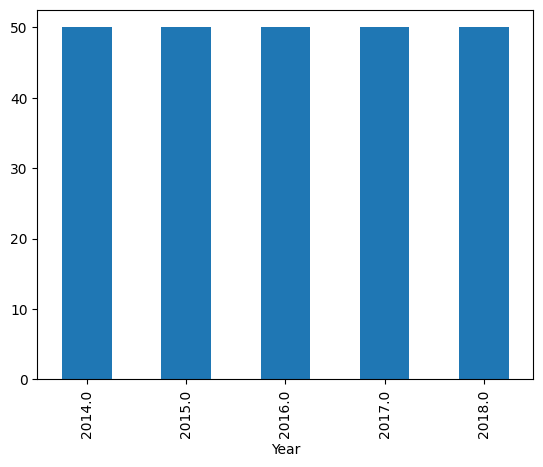

In [32]:
df2_google.groupby('Year')['gender_percent'].mean().plot.bar()

In [34]:
df2.groupby(['Year','Company'])['race_percent'].transform(max)

/tmp/ipykernel_33/2148255141.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df2.groupby(['Year','Company'])['race_percent'].transform(max)


0        45
1        53
2        54
3        53
4        50
       ... 
1311    NaN
1312    NaN
1313    NaN
1314    NaN
1315    NaN
Name: race_percent, Length: 1316, dtype: object

In [39]:
df2.dropna(inplace=True)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 751
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            188 non-null    float64
 1   Company         188 non-null    object 
 2   race            188 non-null    object 
 3   race_percent    188 non-null    object 
 4   Gender          188 non-null    object 
 5   gender_percent  188 non-null    float64
dtypes: float64(2), object(4)
memory usage: 10.3+ KB


In [41]:
df2.race_percent = df2.race_percent.astype(float)

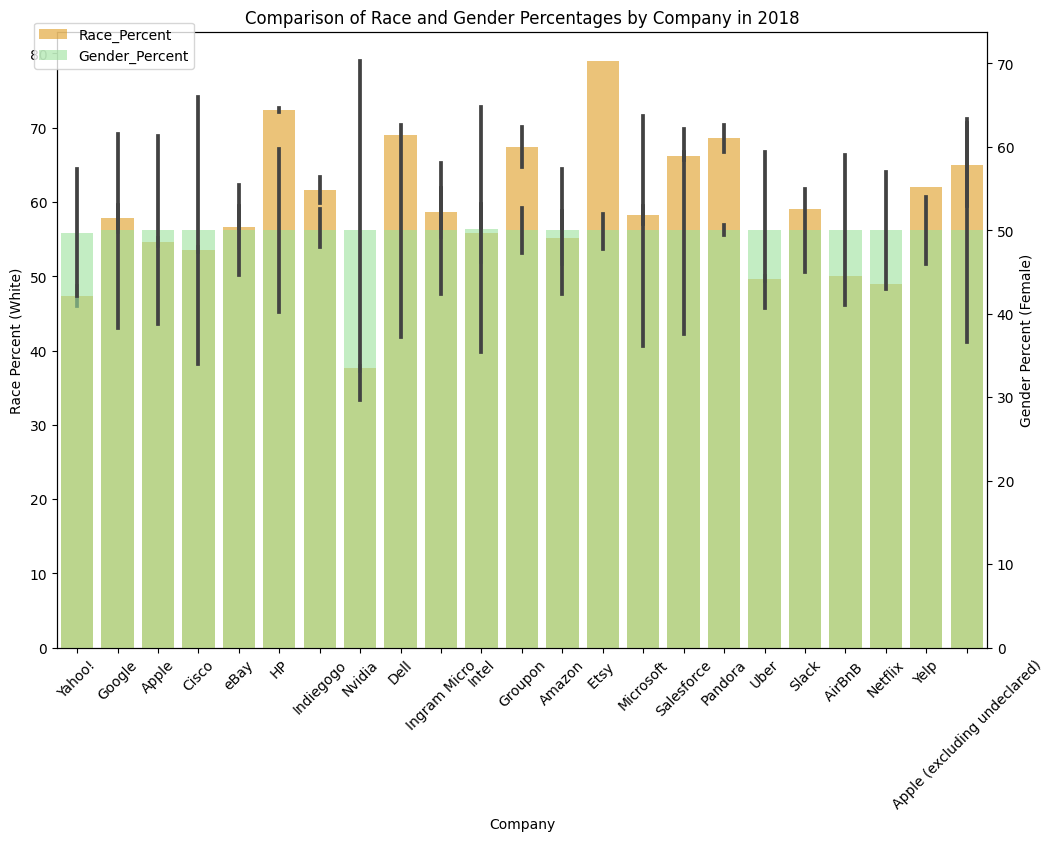

In [52]:
# Plot both race and gender percentages for comparison
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Race Percent
ax2 = ax1.twinx()
sns.barplot(x='Company', y='race_percent', data=df2, ax=ax1, color='orange', alpha=0.6, label='Race_Percent')
sns.barplot(x='Company', y='gender_percent', data=df2, ax=ax2, color='lightgreen', alpha=0.6, label='Gender_Percent')

ax1.set_ylabel('Race Percent (White)')
ax2.set_ylabel('Gender Percent (Female)')
ax1.set_title('Comparison of Race and Gender Percentages by Company in 2018')

fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
ax1.set_xticklabels(labels=list(df2['Company'].unique()),rotation=45)
plt.show()


In [56]:
# Group by Year and Race, then find the index of the maximum Race_Percent
idx = df2.groupby(['Year', 'race'])['race_percent'].idxmax()

# Use these indices to get the corresponding rows from the original DataFrame
highest_race_percent = df2.loc[idx, ['Year', 'race', 'Company', 'race_percent']]

# Display the result
print(highest_race_percent)


      Year   race Company  race_percent
83  2014.0  White      HP          72.0
73  2015.0  White   Etsy           79.0
54  2016.0  White   Etsy           79.0
35  2017.0  White   Etsy           79.0
13  2018.0  White   Etsy           79.0


Above is a table of the highest race percentage for each year.

In [57]:
idx

Year    race 
2014.0  White    83
2015.0  White    73
2016.0  White    54
2017.0  White    35
2018.0  White    13
Name: race_percent, dtype: int64